# 感知机


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LogisticRegression

np.random.seed(700)
# 生成数据
X, y = make_blobs(n_samples=200,n_features=2, centers=2)

# 这里创建了一个逻辑回归模型
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)

w0, w1 = model.coef_[0]
b = model.intercept_

line_x0 = [-12, -4]
line_x1 = [(-b-w0*(-12))/ w1, (-4*w0-b) / w1]

---
首先直观的认识一下感知机：对于下图的二维空间中的两类数据，我们能找到一条直线将两类数据分开（直线上方为一类，直线下方为一类），这么这条直线和其符号函数（激活函数）sign也就是一个我们的找到的感知机。   

---

Text(0, 0.5, 'x1')

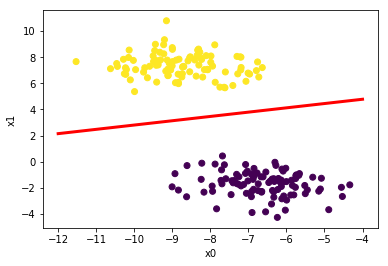

In [3]:
plt.plot(line_x0, line_x1, color='r', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.xlabel('x0')
plt.ylabel('x1')

这里，什么是符号函数sign呢？  
还以二维空间为例，假设我们现在有一条直线，其表达式是$w_0 x^{(0)} + w_1 x^{(1)} + b = 0$，其中$x^{(0)}$，$x^{(1)}$代表数据的两个特征，在图中也就是横坐标和纵坐标。    
现在有一点$(2,5)$，怎么判断他是在直线上方还是下方呢？  
我们需要把(2,5)带入上面的公式, $\hat y = w_0 * 2 + w_1 *5 + b$。 如果$\hat y > 0$ 也就是点在直线上方，这个点被记作属于C1类。如果$\hat y < 0$ 也就是点在直线上方，这个点被记作属于C2类。   

根据上面的解释，由于$\hat y$大于0的值有无数多个，小于0的值也有无数多个，所以，能不能经过一个函数$sign = f(\hat y)$，使得$\hat y$为变为一个的值，又能反应类别呢。伟大的数学家们就定义了这么一个函数，确实能做到。
  
$$
sign(\hat y) = 
\begin{cases}
\hat y = 1, \hat y \geq 0\\\\
\hat y = -1, \hat y < 0
\end{cases}
$$

---
$\hat y$ 经过上面sign函数后，我们就能把$(2,5)$点分为 +1类 或者 -1类 了。

那么，我们怎么确定这条直线呢？  
我们现在已经知道了$X$，所以就要用这些X来确定这条直线了。这里$X$是大写，表示一个矩阵，矩阵的每一行代码我们的一个样本，每一列代表样本的每个特征。

In [4]:
X[:5]

array([[-6.86341325, -2.10361474],
       [-6.96808497,  6.70669116],
       [-9.05281349,  7.04896587],
       [-9.44472478,  8.98683744],
       [-8.22928789,  7.82674603]])

那么怎么开始求解呢，先随机生成我们的$\vec w=[w_0, w_1]$ 和 $b$，这就能在二维空间中确定一条直线了。然后接着看看这条直线能否把这两堆数据分开，不过不能全部分开，那么计算下还差多少（损失函数）才能分开，根据偏差的成调整w和b的值。   

一直重复这个过程，知道找到合适的w和b，能把这两堆数据划分开。
计算过程使用梯度下降法，损失函数使用：

$$
L(w, b) = -\sum_{x_i \in M} y_i(\vec w \cdot \vec x_i + b)
$$

### 下面来解释下损失函数的意义：
